### Implementation of Linear Regression From Scratch

* Gradient Descent Algorithm
* Momentum with Gradient Descent


### Import Required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# import sys  
# !{sys.executable} -m pip install --user matplotlib
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

### Load Boston Data from sklearn

In [2]:
source = load_boston()
data = source['data']
label = source['target']
features = source['feature_names']
print('Shape of X: ',data.shape)
print('Shape of Y: ',label.shape)

X_train,X_test,y_train,y_test = train_test_split(data, label, test_size=0.2, random_state=42)
print('Shape of X_train:{} and y_train:{}'.format(X_train.shape,y_train.shape))
print('Shape of X_test:{} and y_test:{}'.format(X_test.shape,y_test.shape))

# Standardize the data
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
print('Shape After Standardization')
print('Shape of X_train:{} and y_train:{}'.format(X_train.shape,y_train.shape))
print('Shape of X_test:{} and y_test:{}'.format(X_test.shape,y_test.shape))

Shape of X:  (506, 13)
Shape of Y:  (506,)
Shape of X_train:(404, 13) and y_train:(404,)
Shape of X_test:(102, 13) and y_test:(102,)
Shape After Standardization
Shape of X_train:(404, 13) and y_train:(404,)
Shape of X_test:(102, 13) and y_test:(102,)


### LinearRegression Class with Gradient Descent

In [5]:
class LinearRegression:

    def __init__(self,fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.weights = None
        self.bias = None
        self.train_history = {}

    def __weighted_sum(self,x):
        if self.fit_intercept:
            return np.dot(x,self.weights.T)+self.bias
        return np.dot(x,self.weights.T)
    
    def __compute_grads(self, x, y):
        yhat = self.__weighted_sum(x)
        dw = -(y - yhat) * x 
        if self.fit_intercept:
            db = -(y- yhat)
            return dw, db
        return dw, None
       
    def train(self, train_x, train_y, epochs=100, learning_rate=0.01, 
                            validation=False, valid_x=None, 
                            valid_y=None, weights_init=True,
                            weights = None, bias = None,
                            verbose=0
                            ):
        
        if weights_init:
            self.weights = np.random.randn(1,train_x.shape[1])
            if self.fit_intercept:
                self.bias = 0.0
        else:
            self.weights = weights
            self.bias = bias

        for iter in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x,y in zip(train_x,train_y):
                w,b = self.__compute_grads(x,y)
                dw = dw + w
                if self.fit_intercept:
                    db = db + b

            # Total number of training points
            m = train_x.shape[0]

            # update the weights
            self.weights = self.weights - learning_rate * (dw/m)
            if self.fit_intercept:
                self.bias = self.bias - learning_rate * (db/m)

            # compute the loss and put it in dict
            yhat = self.__weighted_sum(train_x)
            self.train_history[iter] = mean_squared_error(yhat,train_y)

        if verbose:
            plt.plot(list(self.train_history.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()

    def predict(self,X):
        y_pred = []
        for x in X:
            y_pred.append(self.__weighted_sum(x))
        return y_pred




### Testing the LinearRegression with Gradient Descent Algorithm

100%|██████████| 5000/5000 [00:25<00:00, 199.18epoch/s]


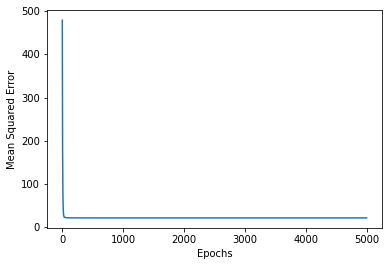

train rmse:  4.6520331848801675
test rmse:  4.928602182665341


In [6]:
lr_GD = LinearRegression()
lr_GD.train(X_train,y_train,epochs=5000,learning_rate=0.1,verbose=1)

y_train_pred = lr_GD.predict(X_train)
y_test_pred = lr_GD.predict(X_test)

print('train rmse: ',mean_squared_error(y_train,y_train_pred,squared=False))
print('test rmse: ',mean_squared_error(y_test,y_test_pred,squared=False))

### LinearRegression Class with Momentum Based Gradient Descent

In [7]:
class LinearRegression_Momentum:

    def __init__(self,fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.weights = None
        self.bias = None
        self.train_history = {}

    def __weighted_sum(self,x):
        if self.fit_intercept:
            return np.dot(x,self.weights.T)+self.bias
        return np.dot(x,self.weights.T)
    
    def __compute_grads(self, x, y):
        yhat = self.__weighted_sum(x)
        dw = -(y - yhat) * x 
        if self.fit_intercept:
            db = -(y- yhat)
            return dw, db
        return dw, None
       
    def train(self, train_x, train_y, epochs=100, 
                            learning_rate=0.01, gamma = 0.01, 
                            validation=False, valid_x=None, 
                            valid_y=None, weights_init=True,
                            weights = None, bias = None,
                            verbose=0
                            ):
        
        if weights_init:
            self.weights = np.random.randn(1,train_x.shape[1])
            if self.fit_intercept:
                self.bias = 0.0
        else:
            self.weights = weights
            self.bias = bias

        vw, vb = 0, 0
        for iter in tqdm(range(epochs), total=epochs, unit="epoch"):
            dw ,db = 0, 0
            for x,y in zip(train_x,train_y):
                w,b = self.__compute_grads(x,y)
                dw = dw + w
                if self.fit_intercept:
                    db = db + b

            # Total number of training points
            m = train_x.shape[0]

            # Accumulate the gradients till t-1 iterations(Momentum)
            vw = gamma * vw + learning_rate * (dw/m)
            if self.fit_intercept:
                vb = gamma * vb + learning_rate * (db/m)
            
            # update the weights using history
            self.weights = self.weights - vw
            if self.fit_intercept:
                self.bias = self.bias - vb

            # compute the loss and put it in dict
            yhat = self.__weighted_sum(train_x)
            self.train_history[iter] = mean_squared_error(yhat,train_y)

        if verbose:
            plt.plot(list(self.train_history.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()

    def predict(self,X):
        y_pred = []
        for x in X:
            y_pred.append(self.__weighted_sum(x))
        return y_pred



### Testing the LinearRegression with Momentum Based Gradient Descent

100%|██████████| 100/100 [00:00<00:00, 193.28epoch/s]


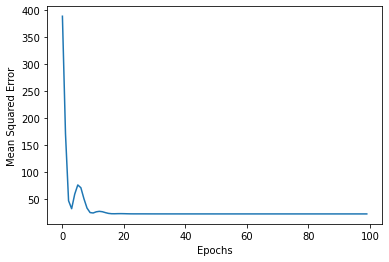

train rmse:  4.652038842066074
test rmse:  4.929683003562748


In [10]:
lr_MGD = LinearRegression_Momentum()
lr_MGD.train(X_train,y_train,epochs=100,learning_rate=0.2,gamma=0.7,verbose=1)

y_train_pred = lr_MGD.predict(X_train)
y_test_pred = lr_MGD.predict(X_test)

print('train rmse: ',mean_squared_error(y_train,y_train_pred,squared=False))
print('test rmse: ',mean_squared_error(y_test,y_test_pred,squared=False))